In [1]:
import pandas as pd
df = pd.read_pickle('m1')
shift = 1

In [2]:
df.columns

Index(['t_DATE', 't_TIME', 't_SEC', 't_BID', 't_ASK', 't_LAST', 't_VOLUME',
       't_TYPE', 'iAC', 'iAD', 'iADX', 'iADXWilder', 'iAlligator', 'iAMA',
       'iAO', 'iATR', 'iBearsPower', 'iBands', 'iBullsPower', 'iCCI',
       'iChaikin', 'iDEMA', 'iDeMarker', 'iEnvelopes', 'iForce', 'iFractals',
       'iFrAMA', 'iIchimoku', 'iBWMFI', 'iMomentum', 'iMFI', 'iMA', 'iOsMA',
       'iMACD', 'iOBV', 'iSAR', 'iRSI', 'iRVI', 'iStdDEV', 'iStochastic',
       'iTEMA', 'iTriX', 'iWPR', 'iVIDyA', 'iVolumes', 't_DATE-TIME'],
      dtype='object')

In [3]:
df.head(3)

,t_DATE,t_TIME,t_SEC,t_BID,t_ASK,t_LAST,t_VOLUME,t_TYPE,iAC,iAD,...,iRSI,iRVI,iStdDEV,iStochastic,iTEMA,iTriX,iWPR,iVIDyA,iVolumes,t_DATE-TIME
0,2020.08.10,09:05,093,5423.5,5424.0,5423.5,1.0,1,-0.410882,683664.895046,...,38.178900,0.142276,3.705654,6.896552,5429.538601,0.000004,-93.478261,5433.286361,5968.0,2020.08.1009:05
1,2020.08.10,09:06,071,5421.5,5422.0,5421.5,4.0,1,-2.524412,677726.702738,...,36.231944,0.063636,4.512413,4.477612,5426.016395,-0.000005,-100.000000,5432.789741,2.0,2020.08.1009:06
2,2020.08.10,09:07,030,5428.5,5429.0,5429.0,1.0,0,-3.124118,684609.559881,...,46.881029,0.101426,3.969493,24.031008,5428.386057,-0.000007,-68.085106,5433.118270,3.0,2020.08.1009:07


#### Volume 1

In [4]:
df['t_LAST_DELTA-10']= df['t_LAST']-df['t_LAST'].shift(shift)
df = df.dropna()

Text(0, 0.5, 'iVolumes')

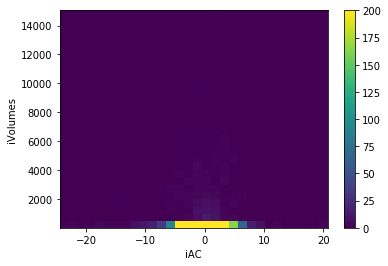

In [5]:
import matplotlib.pyplot as plt
import matplotlib as mlt

plt.hist2d(df['iAC'], df['iVolumes'], bins=(30, 30), vmax=200)
plt.colorbar()
plt.xlabel('iAC')
plt.ylabel('iVolumes')

In [6]:
import numpy as np

v = df['iVolumes']
v_rad = df['iAC']*np.pi / 180
df['Vx'] = v*np.cos(v_rad)
df['Vy'] = v*np.sin(v_rad)
#df=df.drop(columns=['iVolumes','iAC','t_VOLUME'])

(0.9351933965952511,
 15049.407670743756,
 -2207.808415028156,
 1767.4258403127512)

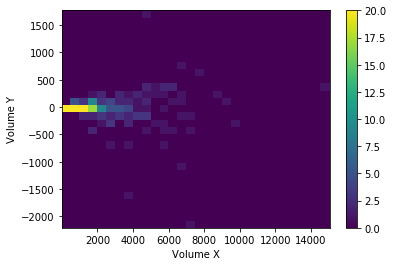

In [7]:
plt.hist2d(df['Vx'], df['Vy'], bins=(30, 30), vmax=20)
plt.colorbar()
plt.xlabel('Volume X')
plt.ylabel('Volume Y')
ax = plt.gca()
ax.axis('tight')

#### Time

Transform time values in sin and cossine, witch is way better to model to interpret

In [8]:
df['t_DATE-TIME']=df['t_DATE']+" "+df['t_TIME']
df['t_DATE-TIME']
date_time = pd.to_datetime(df.pop('t_DATE-TIME'), format='%Y.%m.%d %H:%M')
df = df.drop(columns=['t_DATE', 't_TIME', 't_SEC'])
date_time

1       2020-08-10 09:06:00
2       2020-08-10 09:07:00
3       2020-08-10 09:08:00
4       2020-08-10 09:09:00
5       2020-08-10 09:10:00
                ...        
12974   2020-09-21 17:54:00
12975   2020-09-21 17:55:00
12976   2020-09-21 17:56:00
12977   2020-09-21 17:57:00
12978   2020-09-21 17:58:00
Name: t_DATE-TIME, Length: 12978, dtype: datetime64[ns]

In [9]:
import datetime
timestamp_s = date_time.map(datetime.datetime.timestamp)
timestamp_s

1        1.597061e+09
2        1.597061e+09
3        1.597061e+09
4        1.597061e+09
5        1.597061e+09
             ...     
12974    1.600722e+09
12975    1.600722e+09
12976    1.600722e+09
12977    1.600722e+09
12978    1.600722e+09
Name: t_DATE-TIME, Length: 12978, dtype: float64

In [10]:
day = 24*60*60
df['day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['day cos'] = np.cos(timestamp_s * (2 * np.pi / day))

Text(0.5, 1.0, 'time signal')

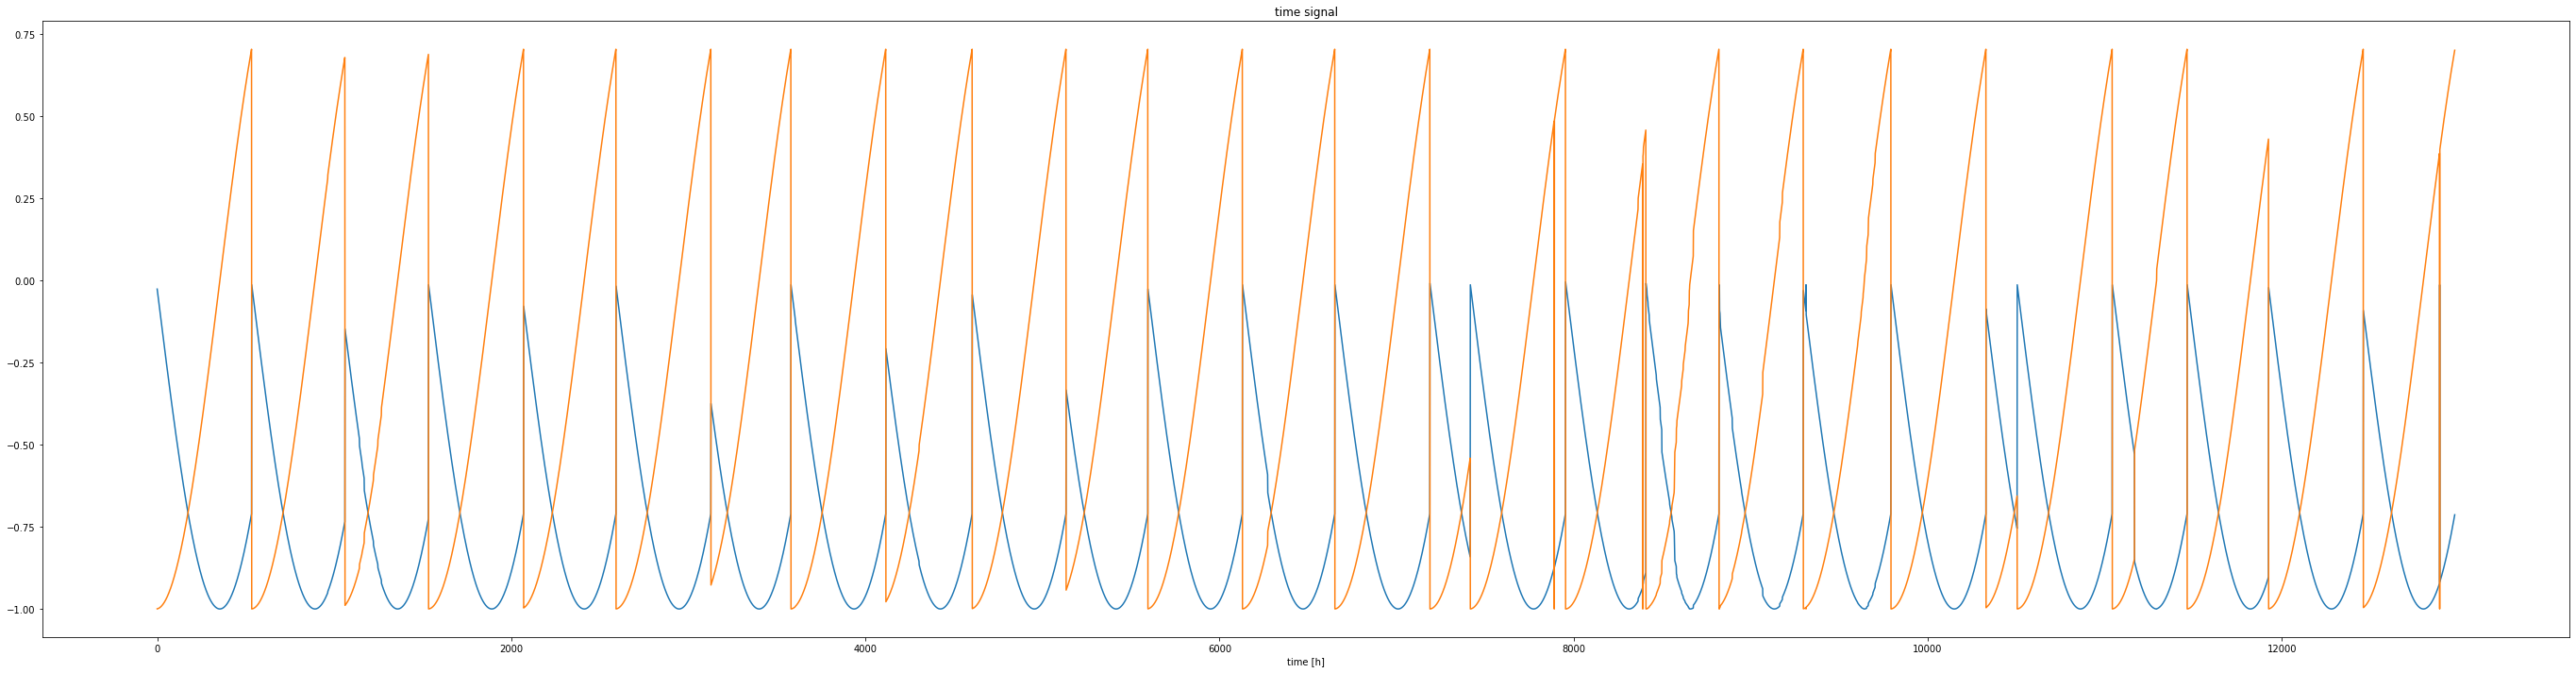

In [11]:
plt.figure(figsize=(48,12))
plt.plot(np.array(df['day sin'])[:])
plt.plot(np.array(df['day cos'])[:])
plt.xlabel('time [h]')
plt.title('time signal')

In [12]:
df

,t_BID,t_ASK,t_LAST,t_VOLUME,t_TYPE,iAC,iAD,iADX,iADXWilder,iAlligator,...,iTEMA,iTriX,iWPR,iVIDyA,iVolumes,t_LAST_DELTA-10,Vx,Vy,day sin,day cos
1,5421.5,5422.0,5421.5,4.0,1,-2.524412,677726.702738,19.927962,17.801641,5431.837172,...,5426.016395,-0.000005,-100.000000,5432.789741,2.0,-2.0,1.998059,-0.088090,-0.026177,-0.999657
2,5428.5,5429.0,5429.0,1.0,0,-3.124118,684609.559881,16.411287,15.835735,5431.849697,...,5428.386057,-0.000007,-68.085106,5433.118270,3.0,7.5,2.995541,-0.163497,-0.030539,-0.999534
3,5425.0,5425.5,5425.0,5.0,1,-3.704118,682669.021419,14.948029,14.991009,5431.861259,...,5425.930378,-0.000015,-85.106383,5432.810475,1.0,-4.0,0.997911,-0.064604,-0.034899,-0.999391
4,5419.0,5419.5,5419.5,3.0,0,-3.673529,671272.243642,17.620463,16.054067,5432.102701,...,5421.705917,-0.000028,-96.226415,5432.042691,1.0,-5.5,0.997945,-0.064071,-0.039260,-0.999229
5,5418.0,5418.5,5418.5,1.0,0,-2.862353,668076.243642,21.279651,16.864707,5432.767878,...,5419.320976,-0.000041,-92.982456,5431.458795,1.0,-1.0,0.998752,-0.049937,-0.043619,-0.999048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12974,5412.5,5413.0,5412.5,5.0,1,0.494412,954236.495957,79.988294,50.770602,5400.505401,...,5414.865147,0.000096,-30.000000,5407.770147,1.0,-2.0,0.999963,0.008629,-0.725374,0.688355
12975,5414.5,5415.0,5415.0,5.0,0,0.490588,954876.353100,81.879417,53.190659,5401.043448,...,5416.132947,0.000102,-13.793103,5408.441390,10.0,2.5,9.999633,0.085623,-0.722364,0.691513
12976,5414.5,5415.0,5414.5,2.0,1,-0.052059,955283.210243,83.517137,55.438476,5401.674721,...,5416.162141,0.000106,-17.857143,5408.808857,1.0,-0.5,1.000000,-0.000909,-0.719340,0.694658
12977,5414.5,5415.0,5415.0,5.0,0,-0.476471,956959.210243,84.878264,57.488092,5402.430511,...,5416.532068,0.000109,-15.384615,5409.259100,2.0,0.5,1.999931,-0.016632,-0.716302,0.697790


In [13]:
df['iRSI']

1        36.231944
2        46.881029
3        42.630395
4        37.626768
5        37.125031
           ...    
12974    66.221791
12975    69.687086
12976    69.012759
12977    69.737744
12978    70.537191
Name: iRSI, Length: 12978, dtype: float64

In [14]:
df.columns

Index(['t_BID', 't_ASK', 't_LAST', 't_VOLUME', 't_TYPE', 'iAC', 'iAD', 'iADX',
       'iADXWilder', 'iAlligator', 'iAMA', 'iAO', 'iATR', 'iBearsPower',
       'iBands', 'iBullsPower', 'iCCI', 'iChaikin', 'iDEMA', 'iDeMarker',
       'iEnvelopes', 'iForce', 'iFractals', 'iFrAMA', 'iIchimoku', 'iBWMFI',
       'iMomentum', 'iMFI', 'iMA', 'iOsMA', 'iMACD', 'iOBV', 'iSAR', 'iRSI',
       'iRVI', 'iStdDEV', 'iStochastic', 'iTEMA', 'iTriX', 'iWPR', 'iVIDyA',
       'iVolumes', 't_LAST_DELTA-10', 'Vx', 'Vy', 'day sin', 'day cos'],
      dtype='object')

In [15]:
df['t_BID'].describe()

count    12978.000000
mean      5429.253930
std        112.933083
min       5214.000000
25%       5337.500000
50%       5411.500000
75%       5516.500000
max       5901.500000
Name: t_BID, dtype: float64

In [16]:
features_list = ['t_LAST','iOsMA','iAC','iCCI', 'iMFI','iRSI','iWPR','Vx','Vy','Vol_slope','day sin','day cos','t_LAST_DELTA']
df['Vol_slope'] = df['Vy'] / df['Vx']
df['Vol_slope'] = np.arctan(df['Vol_slope'])
df['t_LAST'] = df['t_LAST'] - df['iVIDyA']
df['iOsMA'] = df['iOsMA'] / abs(df['iOsMA'])
#df['iMFI'] = [1 if x > 80 else -1 if x < 20 else 0 for x in df['iMFI']]
#df['iWPR'] = [1 if x > -20 else -1 if x < -80 else 0 for x in df['iWPR']]
#df['iCCI'] = [1 if x > 100 else -1 if x < -100 else 0 for x in df['iCCI']]
#df['iRSI'] = [1 if x > 70 else -1 if x < 30 else 0 for x in df['iRSI']]
#df['iWPR'] = [1 if x > -20 else -1 if x < -80 else 0 for x in df['iWPR']]
df['t_LAST_DELTA'] = df['t_LAST'].shift(-shift) - df['t_LAST']
df = df.dropna()
#df['up'] = [1 if x >= 6 else 0 for x in df['t_LAST_DELTA']]
#df['const'] = [1 if -6 <= x < 6 else 0 for x in df['t_LAST_DELTA']]
#df['down'] = [1 if x < -6 else 0 for x in df['t_LAST_DELTA']]
#df['Vx'] = df['Vx'] / 1000
#df['Vy'] = df['Vy'] / 1000

#df['t_LAST_DELTA-10'] = df['t_LAST'] - df['t_LAST'].shift(10)
#df['t_LAST_DELTA-5'] = df['t_LAST'] - df['t_LAST'].shift(5)
df = df[features_list]
df.set_index(np.arange(len(df)))
df

,t_LAST,iOsMA,iAC,iCCI,iMFI,iRSI,iWPR,Vx,Vy,Vol_slope,day sin,day cos,t_LAST_DELTA
1,-11.289741,-1.0,-2.524412,-214.081408,15.120219,36.231944,-100.000000,1.998059,-0.088090,-0.044059,-0.026177,-0.999657,7.171471
2,-4.118270,-1.0,-3.124118,-63.396226,31.583545,46.881029,-68.085106,2.995541,-0.163497,-0.054526,-0.030539,-0.999534,-3.692205
3,-7.810475,-1.0,-3.704118,-115.953836,28.508352,42.630395,-85.106383,0.997911,-0.064604,-0.064649,-0.034899,-0.999391,-4.732216
4,-12.542691,-1.0,-3.673529,-153.046595,24.777564,37.626768,-96.226415,0.997945,-0.064071,-0.064115,-0.039260,-0.999229,-0.416104
5,-12.958795,-1.0,-2.862353,-130.144267,22.420127,37.125031,-92.982456,0.998752,-0.049937,-0.049957,-0.043619,-0.999048,1.662483
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12973,6.796552,1.0,1.343529,116.239316,93.020055,72.265724,-14.285714,0.999725,0.023447,0.023449,-0.728371,0.685183,-2.066699
12974,4.729853,1.0,0.494412,72.994350,89.413050,66.221791,-30.000000,0.999963,0.008629,0.008629,-0.725374,0.688355,1.828757
12975,6.558610,1.0,0.490588,96.491228,89.008425,69.687086,-13.793103,9.999633,0.085623,0.008562,-0.722364,0.691513,-0.867467
12976,5.691143,1.0,-0.052059,81.492537,89.088816,69.012759,-17.857143,1.000000,-0.000909,-0.000909,-0.719340,0.694658,0.049757


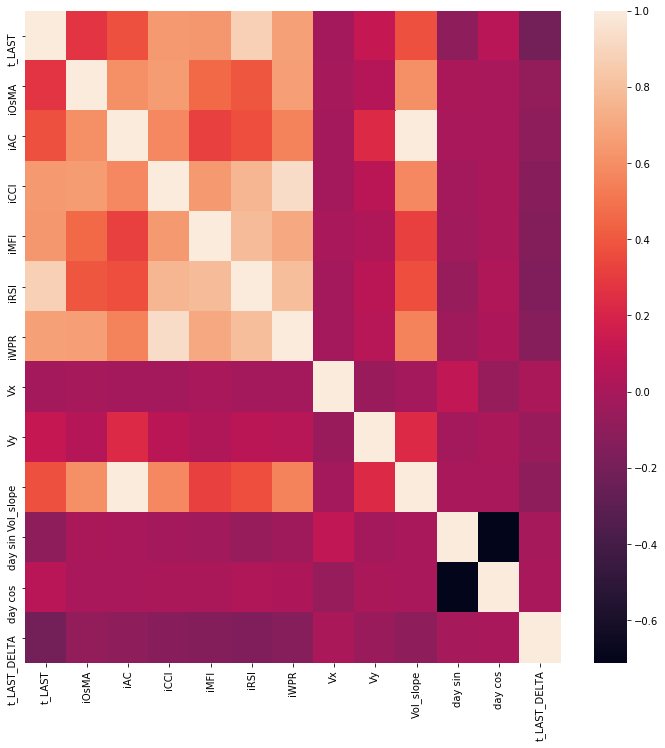

In [121]:
import seaborn as sn
import matplotlib.pyplot as plt

#sns.pairplot(df)

plt.figure(figsize=(12,12))
sn.heatmap(df.corr()) # , annot = True
plt.show()

In [17]:
df = df.dropna()

In [18]:
df.describe()

,t_LAST,iOsMA,iAC,iCCI,iMFI,iRSI,iWPR,Vx,Vy,Vol_slope,day sin,day cos,t_LAST_DELTA
count,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000,12977.000000,1.297700e+04,12977.000000,12977.000000
mean,-0.374244,0.006396,0.013779,1.902876,49.531263,50.071610,-48.843374,48.056916,-0.278694,0.000240,-7.309953e-01,-0.305993,0.001316
std,7.099733,1.000018,2.070889,99.931517,19.081597,12.145945,28.882106,434.344564,38.149472,0.036144,2.753788e-01,0.544251,2.910999
min,-56.176027,-1.000000,-24.440000,-466.666667,0.000000,8.945867,-100.000000,0.935193,-2207.808415,-0.426558,-1.000000e+00,-1.000000,-67.000000
25%,-4.444959,-1.000000,-0.974412,-77.777778,35.268885,41.975977,-74.074074,0.999801,-0.025494,-0.017007,-9.575714e-01,-0.826590,-1.071915
50%,0.121100,1.000000,0.017647,4.341085,49.011326,50.173197,-48.484848,0.999990,0.000462,0.000308,-8.338858e-01,-0.390731,0.007158
75%,4.040810,1.000000,1.046471,82.411348,63.504555,58.400119,-23.529412,2.998115,0.027978,0.018264,-5.628049e-01,0.182236,1.178070
max,68.408053,1.000000,20.740588,466.666667,100.000000,92.902225,0.000000,15049.407671,1767.425840,0.361992,1.169150e-11,0.704015,68.417724


In [167]:
len(df)

12977

In [37]:
def window_df(df, window_size,shift=shift):
    x=[]
    y=[]
    for index, row in df.iterrows():
       if (index+window_size+shift) >= len(df):
        break
       x.append(np.array(df.iloc[index:index+window_size,:-1].values))
       y.append(df.iloc[index+window_size+shift,-1])
    
    return np.array(x),np.array(y)

In [38]:
x,y = window_df(df, 10)

In [124]:
n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

In [125]:
X_train, X_val, y_train, y_val = train_df.iloc[:,:-1], val_df.iloc[:,:-1], train_df.iloc[:,-1], val_df.iloc[:,-1]

In [43]:
n = len(x)
X_train, X_val, y_train, y_val = x[0:int(n*0.7)], x[int(n*0.7):int(n*0.9)], y[0:int(n*0.7)], y[int(n*0.7):int(n*0.9)]

In [126]:
X_train = X_train.values
X_val = X_val.values
y_train = y_train.values
y_val = y_val.values

In [44]:
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(9075, 10, 12) (2593, 10, 12) (9075,) (2593,)


In [45]:
X_train[0].shape

(10, 12)

In [65]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

In [23]:
import tensorflow as tf

In [24]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.6):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True
        
def scheduler(epoch, lr):
  if epoch < 150:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

def weights_cal_and_fit(sequencial,X_train, y_train,validation_data, w_cal, w_epochs, MAX_EPOCHS):
        early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5,mode='min')
    
        model_loss=np.zeros(w_cal)
        weights_holder=[]
        for i in range(w_cal):
            model=sequencial
            model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.SGD(lr=1e-2, momentum=0.9),metrics=["accuracy"])
            temp_history = model.fit(X_train, y_train, epochs=w_epochs,validation_data=validation_data,verbose=0)
            model_loss.put(i, temp_history.history['accuracy'][-1])
            weights_holder.append(model)
        model=weights_holder[np.argmax(model_loss)]
        history = model.fit(X_train, y_train, epochs=MAX_EPOCHS,batch_size=72,validation_data=validation_data)
        return history, model

In [25]:
from tensorflow import keras
METRICS = []

Instantiate and evaluate this model:

## BASELINE

In [26]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_val[:-1],y_val[1:])

2.313136063583831

In [46]:
model = tf.keras.models.Sequential([
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(input_shape=X_train[0].shape),
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),input_shape=[None]),
    tf.keras.layers.SimpleRNN(64, return_sequences=True),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32,kernel_regularizer=tf.keras.regularizers.L1(0.004),activity_regularizer=tf.keras.regularizers.L2(0.04), input_shape=X_train[0].shape),
    tf.keras.layers.Dense(1),
])
#optimizer=keras.optimizers.Adam(lr=1e-3),
model.compile(loss='mae', optimizer='sgd',metrics=['mse'])
my_callback1 = tf.keras.callbacks.LearningRateScheduler(scheduler)
my_callback2 = myCallback()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 120)               0         
_________________________________________________________________
lambda_3 (Lambda)            (None, 120, 1)            0         
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 120, 64)           4224      
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 32)                3104      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [47]:
%%time
MAX_EPOCHS=300
history = model.fit(X_train, y_train, epochs=MAX_EPOCHS, batch_size=60, validation_data=(X_val, y_val),verbose=2,shuffle=False)

Epoch 1/300
152/152 - 12s - loss: 2.5071 - mse: 9.2114 - val_loss: 2.1756 - val_mse: 6.6529
Epoch 2/300
152/152 - 10s - loss: 2.3704 - mse: 9.1464 - val_loss: 2.1221 - val_mse: 6.6079
Epoch 3/300
152/152 - 11s - loss: 2.3239 - mse: 9.0985 - val_loss: 2.1005 - val_mse: 6.6441
Epoch 4/300
152/152 - 10s - loss: 2.2906 - mse: 9.0947 - val_loss: 2.0733 - val_mse: 6.6356
Epoch 5/300
152/152 - 11s - loss: 2.2601 - mse: 9.0952 - val_loss: 2.0388 - val_mse: 6.6048
Epoch 6/300
152/152 - 11s - loss: 2.2341 - mse: 9.0867 - val_loss: 2.0145 - val_mse: 6.6038
Epoch 7/300
152/152 - 10s - loss: 2.2096 - mse: 9.0950 - val_loss: 1.9852 - val_mse: 6.5853
Epoch 8/300
152/152 - 11s - loss: 2.1839 - mse: 9.0819 - val_loss: 1.9585 - val_mse: 6.5742
Epoch 9/300
152/152 - 10s - loss: 2.1608 - mse: 9.0751 - val_loss: 1.9331 - val_mse: 6.5680
Epoch 10/300
152/152 - 10s - loss: 2.1346 - mse: 9.0662 - val_loss: 1.9131 - val_mse: 6.5697
Epoch 11/300
152/152 - 10s - loss: 2.1147 - mse: 9.0698 - val_loss: 1.8947 - va

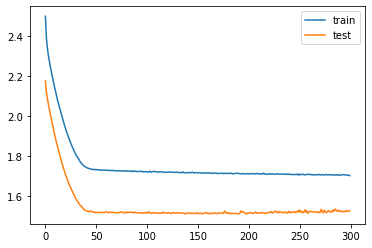

In [134]:
plt.plot(history.history['loss'][:], label='train')
plt.plot(history.history['val_loss'][:], label='test')
plt.legend()
plt.show()

In [135]:
X_test, y_test = test_df.iloc[:,:-1], test_df.iloc[:,-1]
X_test = scaler.transform(X_test)

In [136]:
predict=model.predict(X_test)

In [102]:
predict=xgb_preds

In [ ]:
predict

In [326]:
y_test_v = y_test.values

In [ ]:
y_test_v

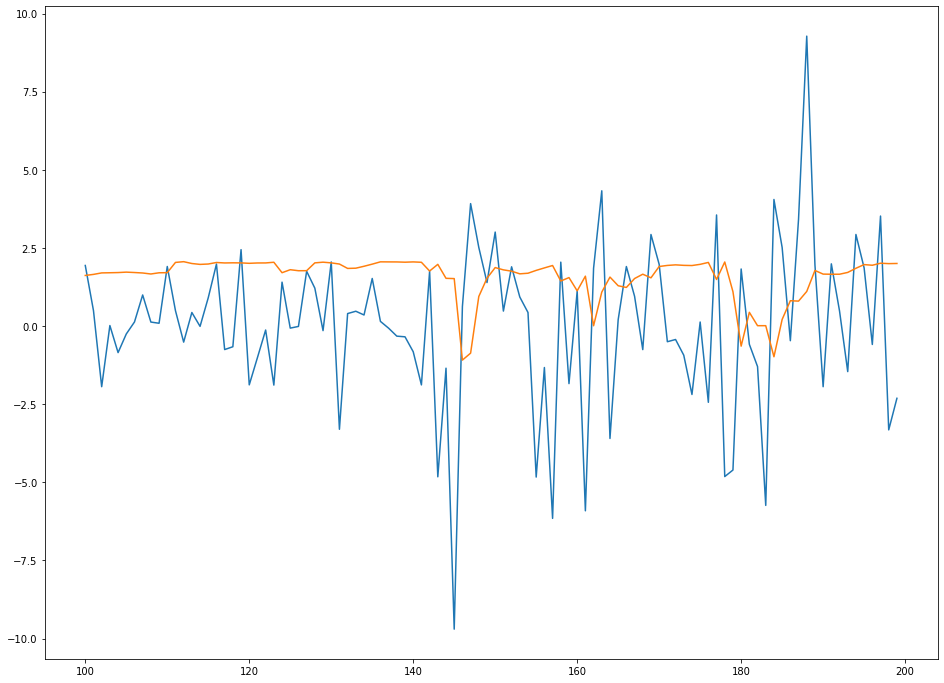

In [137]:
start=100
end=200
plt.figure(figsize = (16, 12))
plt.plot(np.arange(len(y_test))[start:end], y_test[start:end])
plt.plot(np.arange(len(predict))[start:end], predict[start:end])
plt.show()

In [138]:
model.evaluate(X_test, y_test)

41/41 [==============================] - 0s 3ms/step - loss: 2.3845 - mse: 10.7966


[2.384453773498535, 10.796623229980469]

In [33]:
model.save('models/RNN_model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: models/RNN_model\assets


In [17]:
loaded_model = tf.keras.models.load_model('models/RNN_model')
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, None, 1)           0         
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, None, 32)          1088      
_________________________________________________________________
dropout (Dropout)            (None, None, 32)          0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 8)                 328       
_________________________________________________________________
dense (Dense)                (None, 8)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 1,497
Trainable params: 1,497
Non-trainable params: 0
______________________________________________________

In [18]:
model = loaded_model

In [19]:
import thread_main_loop as tml

In [20]:
t1 = tml.thread_main_loop(model, "0", "1", scaler)
t1.start()

#########
t_BID      5533.000000
t_ASK      5533.500000
t_LAST     5533.500000
Vx        -2733.196299
Vy        -7077.584827
day sin      -0.477159
day cos      -0.878817
Name: 0, dtype: float64
#########


Exception in thread Thread-6:
Traceback (most recent call last):
  File "C:\Users\Henrique\anaconda3\lib\threading.py", line 926, in _bootstrap_inner
    self.run()
  File "C:\Users\Henrique\Workspace\jupyter_workspace\my_advisor\thread_main_loop.py", line 115, in run
    last_row = self.scaler.transform(last_row)
  File "C:\Users\Henrique\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py", line 794, in transform
    force_all_finite='allow-nan')
  File "C:\Users\Henrique\anaconda3\lib\site-packages\sklearn\base.py", line 436, in _validate_data
    self._check_n_features(X, reset=reset)
  File "C:\Users\Henrique\anaconda3\lib\site-packages\sklearn\base.py", line 380, in _check_n_features
    self.n_features_in_)
ValueError: X has 7 features, but this StandardScaler is expecting 8 features as input.



In [6]:
t1.kill()

In [25]:
import tensorflow as tf

In [82]:
from tensorflow import keras
METRICS = [
    tf.keras.metrics.MeanSquaredLogarithmicError(
    name='mean_squared_logarithmic_error', dtype=None
    )
]

In [83]:
output_bias = y_train.mean()
output_bias = tf.keras.initializers.Constant(output_bias)

model = tf.keras.models.Sequential([
    #tf.keras.layers.Flatten(input_shape=(X_train[0].shape)),
    tf.keras.layers.LayerNormalization(),
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),input_shape=[None]),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16,kernel_regularizer=tf.keras.regularizers.L1(0.002),activity_regularizer=tf.keras.regularizers.L2(0.02)),
    tf.keras.layers.Dense(1, use_bias=True, bias_initializer=output_bias)
])

In [84]:
optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(
      optimizer=optimizer,
      loss='mae',
      metrics='mse')

In [85]:
%%time
MAX_EPOCHS=100
history = model.fit(X_train, y_train, epochs=MAX_EPOCHS,batch_size=72, validation_data=(X_val, y_val),verbose=2,shuffle=False, )

Epoch 1/100
127/127 - 2s - loss: 1.8782 - mse: 9.0635 - val_loss: 1.6264 - val_mse: 6.5244
Epoch 2/100
127/127 - 1s - loss: 1.8122 - mse: 9.0569 - val_loss: 1.5753 - val_mse: 6.5178
Epoch 3/100
127/127 - 1s - loss: 1.7753 - mse: 9.0462 - val_loss: 1.5502 - val_mse: 6.5084
Epoch 4/100
127/127 - 1s - loss: 1.7589 - mse: 9.0442 - val_loss: 1.5391 - val_mse: 6.5023
Epoch 5/100
127/127 - 1s - loss: 1.7513 - mse: 9.0352 - val_loss: 1.5341 - val_mse: 6.5010
Epoch 6/100
127/127 - 1s - loss: 1.7467 - mse: 9.0281 - val_loss: 1.5300 - val_mse: 6.4991
Epoch 7/100
127/127 - 1s - loss: 1.7436 - mse: 9.0309 - val_loss: 1.5295 - val_mse: 6.5085
Epoch 8/100
127/127 - 1s - loss: 1.7404 - mse: 9.0222 - val_loss: 1.5273 - val_mse: 6.5036
Epoch 9/100
127/127 - 1s - loss: 1.7393 - mse: 9.0211 - val_loss: 1.5252 - val_mse: 6.4995
Epoch 10/100
127/127 - 1s - loss: 1.7377 - mse: 9.0228 - val_loss: 1.5254 - val_mse: 6.5062
Epoch 11/100
127/127 - 1s - loss: 1.7382 - mse: 9.0237 - val_loss: 1.5235 - val_mse: 6.49

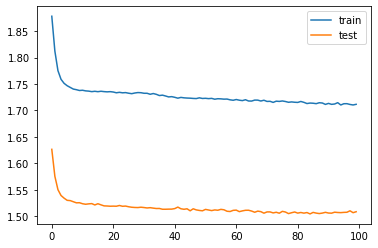

In [86]:
plt.plot(history.history['loss'][:], label='train')
plt.plot(history.history['val_loss'][:], label='test')
plt.legend()
plt.show()

In [90]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),input_shape=[None]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(8,kernel_regularizer=tf.keras.regularizers.L1(0.004),activity_regularizer=tf.keras.regularizers.L2(0.04)),
    tf.keras.layers.Dense(1),
])
optimizer = tf.keras.optimizers.Adam(lr=1e-2)
model.compile(loss='mae', optimizer=optimizer,metrics=['mse'])

In [176]:
output_bias = y_val.mean()
output_bias = tf.keras.initializers.Constant(output_bias)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(1)
])

In [177]:
optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(loss='mae',
            optimizer=optimizer,
            metrics=['mse'])

In [91]:
%%time
MAX_EPOCHS=100
history = model.fit(X_train, y_train, epochs=MAX_EPOCHS, batch_size=72, validation_data=(X_val, y_val),verbose=2,shuffle=False)

Epoch 1/200
127/127 - 1s - loss: 1.8278 - mse: 9.0485 - val_loss: 1.5651 - val_mse: 6.5571
Epoch 2/200
127/127 - 1s - loss: 1.7540 - mse: 9.0440 - val_loss: 1.5516 - val_mse: 6.5861
Epoch 3/200
127/127 - 1s - loss: 1.7513 - mse: 9.0507 - val_loss: 1.5727 - val_mse: 6.6604
Epoch 4/200
127/127 - 1s - loss: 1.7555 - mse: 9.0752 - val_loss: 1.5552 - val_mse: 6.5566
Epoch 5/200
127/127 - 1s - loss: 1.7490 - mse: 9.0334 - val_loss: 1.5573 - val_mse: 6.6059
Epoch 6/200
127/127 - 1s - loss: 1.7544 - mse: 9.0611 - val_loss: 1.5368 - val_mse: 6.5071
Epoch 7/200
127/127 - 1s - loss: 1.7578 - mse: 9.0895 - val_loss: 1.5691 - val_mse: 6.6113
Epoch 8/200
127/127 - 1s - loss: 1.7611 - mse: 9.0632 - val_loss: 1.5621 - val_mse: 6.5875
Epoch 9/200
127/127 - 1s - loss: 1.7596 - mse: 9.0879 - val_loss: 1.5597 - val_mse: 6.5951
Epoch 10/200
127/127 - 1s - loss: 1.7550 - mse: 9.0457 - val_loss: 1.5691 - val_mse: 6.6613
Epoch 11/200
127/127 - 1s - loss: 1.7623 - mse: 9.0855 - val_loss: 1.5771 - val_mse: 6.65

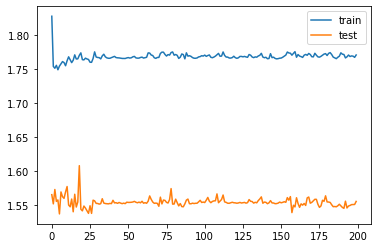

In [92]:
plt.plot(history.history['loss'][:], label='train')
plt.plot(history.history['val_loss'][:], label='test')
plt.legend()
plt.show()

In [96]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
reg.score(X_val, y_val)

0.03527048430622903

In [97]:
reg.coef_

array([-0.98892842, -0.0708295 , -0.00371382, -0.04680018, -0.23325044,
        0.57435047,  0.07807534,  0.02246842, -0.07747984, -0.00371382,
       -0.15317627, -0.06634303])

In [98]:
reg.intercept_

0.001880514257404167

In [80]:
predict = reg.predict(X_val)

In [81]:
for i in range(len(predict)):
    predict[i] = abs(predict[i])

In [ ]:
from sklearn.metrics import mean_squared_log_error
print(np.sqrt(mean_squared_log_error(y_val, predict)))

In [99]:
import xgboost as xgb
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

xgb_model = xgb.XGBRegressor(n_estimators=3000, learning_rate=0.003, random_state=0)

xgb_model.fit(X_train, y_train, verbose=True)

xgb_model.fit(X_train, y_train)

xgb_preds = xgb_model.predict(X_val)

print('MAE:', mean_absolute_error(y_val, xgb_preds))

MAE: 1.5370446500081363


In [ ]:
from sklearn.metrics import mean_squared_log_error
print(np.sqrt(mean_squared_log_error(y_val, xgb_preds)))

In [100]:
hp_model = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.002, max_delta_step=0, max_depth=4,
             min_child_weight=1, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=2, random_state=3,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=2, verbosity=None)


hp_model.fit(X_train, y_train, verbose=True)

hp_preds = hp_model.predict(X_val)

print('MAE:', mean_absolute_error(y_val, hp_preds))

MAE: 1.5005747239344007


In [ ]:
from sklearn.metrics import mean_squared_log_error
print(np.sqrt(mean_squared_log_error(y_val, hp_preds)))

In [ ]:
np.any(np.isnan(test))

In [ ]:
from numpy import *
where_are_NaNs = isnan(test)
test[where_are_NaNs] = 0

In [ ]:
np.all(np.isfinite(test))

In [ ]:
test_predict=reg.predict(test)
submission['SalePrice']=test_predict

In [ ]:
submission

In [ ]:
submission.to_csv('submission.csv', index=False)